# Demonstration of Logistic Regression Usage on WDBC Dataset

Date: September, 2024<br>
Author: **Marcin Sikorski**

**Notebook Content:**
1. Synopsis & Introduction
2. Classification Example
3. Classification With Two Features
4. Hyperparameter Tuning
5. Scikit-learn Model

### 1. Synopsis & Introduction

In machine learning and statistics, logistic regression (or logit regression) estimates the parameters of a logistic model. This is a linear classification model that predicts binary outcomes based on a set of explanatory variables (i.e. features). In logit regression, we are interested in determining the probability that an observation belongs to a given class (yes-no, 0-1, true-false, etc.). The basis of this method is the logistic function of the form:
$$f(z) = \frac{1}{1 + e^{-z}}.$$

We can map a linear combination of weights and sample features and transform them to a probability value between 0 and 1 through the sigmoid curve:
$$z = w^Tx = w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{m-1}x_{m-1} + w_{m}x_{m}.$$

If $f(z)$ falls above a probabilistic threshold (or cut-off) for a given instance, the model categorizes the instance as class 1, otherwise class 0. The weights $w$ of the sigmoid function can be learned by minimizing the log-likelihood function $J(w)$ (the logistic regression cost function) through gradient descent:
$$J(w) = \sum_{i} y^i \times \ln[f(z^i) + (1 - y^i) \times \ln(1 - f(z^i)].$$

In case the logit regression model overfits the training data (me have high variance), it may be optimum to perform regularization to penalize large weight coefficients. The following bias terms can be introduced to the model's cost function:
* L1 regularization (LASSO):
  $$\lambda \sum_{j=1}^{m} |w_{j}|,$$

* L2 regularization (ridge):
  $$\lambda \sum_{j=1}^{m} w_{j}^2,$$

* elastic net - $\alpha$ is the L1 ratio:
  $$\lambda \alpha \sum_{j=1}^{m} |w_{j}| + \lambda (1 - \alpha) \sum_{j=1}^{m} w_{j}^2.$$

Defining an implementing the regularization parameter $C=1/\lambda$, the get the new logistic regression cost function:
$$J(w) = C[-\sum_{i} y^i \times \ln[f(z^i) + (1 - y^i) \times \ln(1 - f(z^i)]] + \text{reg term}.$$

### 2. Classification Example

This project contains a logistic regression model for binary classification from scratch. To test the classifier, we will use data from the UCI Machine Learning Repository. An example will be performed on the [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). We will take any parameters in the class method without penalty.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# import data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, sep=',', header=None)
df = df.dropna()

# create new list of column names
header = []
for i, col in enumerate(df.columns):
    column_name = 'feature_' + str(i)
    header.append(column_name)

# add new column names to dataframe
df.columns = header

# drop first column
df.drop(df.columns[0], axis=1, inplace=True)

# rename target column
df.rename(columns={'feature_1': 'diagnosis'}, inplace=True)
df.head()

,diagnosis,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# encode target labels
# negative class = 0 (benign)
# positive class = 1 (malignant)
lab_encoder = LabelEncoder()

X = df.iloc[:, 1:].values
y = lab_encoder.fit_transform(df['diagnosis'])

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split data into 0.7/0.3 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, train_size=0.7, random_state=42)

print('Train set:', len(X_train))
print('Test set:', len(X_test))

Train set: 398
Test set: 171


In [3]:
from logistic_regression import LogisticRegression

lr_mod = LogisticRegression(learning_rate=0.0001, num_iter=10, penalty=None, C=0.01)
lr_mod.fit(X_train, y_train)

preds = lr_mod.predict(X_test)
performance = lr_mod.evaluate(preds, y_test)

# print evaluation metrics
for key, value in performance.items():
    print('%s: %.4f' % (key, value))

Accuracy: 0.9357
Recall: 0.9206
Precision: 0.9062
Error Rate: 0.0643
F1 Score: 0.9134
F2 Score: 0.9177
Specificity: 0.9444
Arithmetric Mean: 0.9325
Geometric Mean: 0.9325
Harmonic Mean: 0.9324
Matthews Correlation Coefficient: 0.8623
Negative Prediction Value: 0.9533
False Negative Rate: 0.0794
False Positive Rate: 0.0556
True Negative Rate: 0.9444
False Discover Rate: 0.0938
Log Loss: 2.2218
Receiver Operating Characteristic: 0.9326
Misclassified Samples: 11.0000


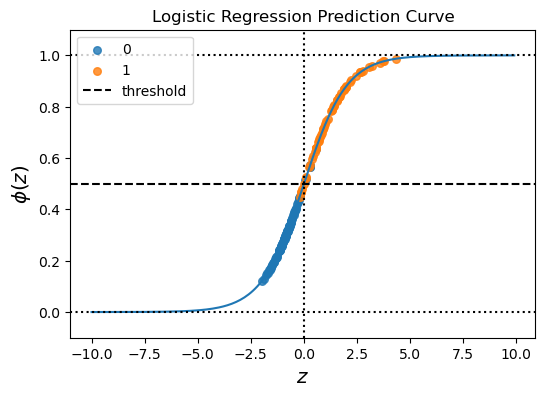

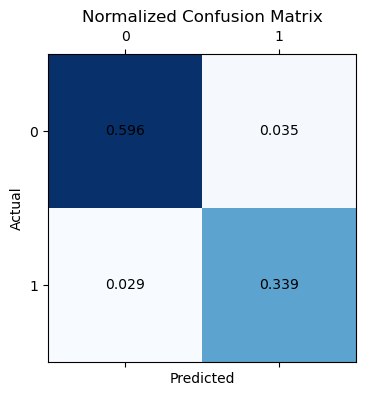

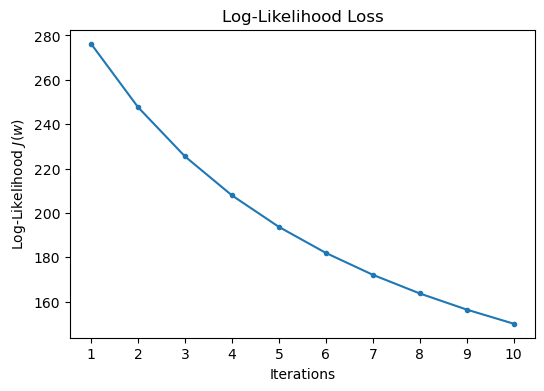

In [4]:
lr_mod.plot_prediction_curve(X_test, y_test)
lr_mod.plot_confusion_matrix(preds, y_test)
lr_mod.plot_cost()

### 3. Classification With Two Features

We will train the classifier with two features and display decision boundaries. For dimensionality reduction we will implement principal component analysis (PCA). The cut-off probability (threshold) will be set as 70% - any instance with probability below 70% (or 0.7) will be predicted as 0.

In [5]:
from sklearn.decomposition import PCA

# principle component analysis for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [6]:
lr_pca = LogisticRegression(learning_rate=0.001, num_iter=20, penalty='L1', C=0.01)
lr_pca.fit(X_train_pca, y_train)

# make predictions on test data with cut-off probability 70%
preds_pca = lr_pca.predict(X_test_pca, 0.7)
eval_metrics = lr_pca.evaluate(preds_pca, y_test)

# print evaluation metrics
for key, value in eval_metrics.items():
    print('%s: %.4f' % (key, value))

Accuracy: 0.9591
Recall: 0.9841
Precision: 0.9118
Error Rate: 0.0409
F1 Score: 0.9466
F2 Score: 0.9688
Specificity: 0.9444
Arithmetric Mean: 0.9643
Geometric Mean: 0.9641
Harmonic Mean: 0.9639
Matthews Correlation Coefficient: 0.9152
Negative Prediction Value: 0.9903
False Negative Rate: 0.0159
False Positive Rate: 0.0556
True Negative Rate: 0.9444
False Discover Rate: 0.0882
Log Loss: 1.4139
Receiver Operating Characteristic: 0.9645
Missed Classified Samples: 7.0000


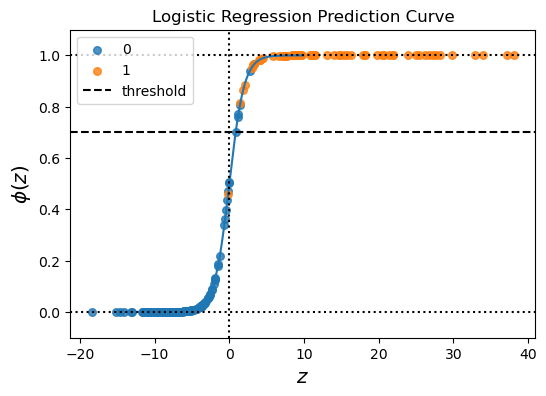

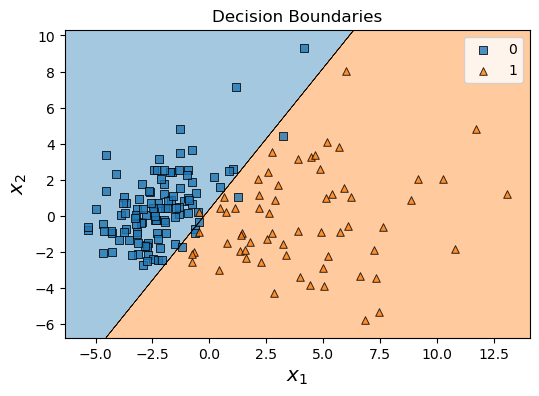

In [7]:
# note higher threshold on chart (dashed line)
lr_pca.plot_prediction_curve(X_test_pca, y_test)
lr_pca.plot_decision_boundaries(X_test_pca, y_test)

### 4. Hyperparameter Tuning

Finding the optimum hyperparameters with `scikit-learns`'s grid search method.

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1.0, 0.1, 0.01, 0.001],
    'penalty': [None, 'L1', 'L2', 'elasticnet'],
    'learning_rate': [0.01, 0.001, 0.0001],
    'l1_ratio': [0.2, 0.5, 0.8],
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
 
# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# display results
print('Best hyperparameters:', grid_search.best_params_)
print('Best accuracy score: {:.4f}'.format(grid_search.best_score_))

# evaluate on the test/validation set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print('\nTest accuracy: {:.4f}'.format(accuracy))

Best hyperparameters: {'C': 0.1, 'l1_ratio': 0.2, 'learning_rate': 0.01, 'penalty': 'elasticnet'}
Best accuracy score: 0.9723

Test accuracy: 0.9825


In [9]:
# run model with best parameters
log_reg = LogisticRegression(**grid_search.best_params_)
log_reg.fit(X_train, y_train)

# make predictions on test data
predictions = log_reg.predict(X_test)
eval_metrics = log_reg.evaluate(predictions, y_test)

# print evaluation metrics
for key, value in eval_metrics.items():
    print('%s: %.4f' % (key, value))

Accuracy: 0.9883
Recall: 0.9841
Precision: 0.9841
Error Rate: 0.0117
F1 Score: 0.9841
F2 Score: 0.9841
Specificity: 0.9907
Arithmetric Mean: 0.9874
Geometric Mean: 0.9874
Harmonic Mean: 0.9874
Matthews Correlation Coefficient: 0.9749
Negative Prediction Value: 0.9907
False Negative Rate: 0.0159
False Positive Rate: 0.0093
True Negative Rate: 0.9907
False Discover Rate: 0.0159
Log Loss: 0.4040
Receiver Operating Characteristic: 0.9874
Misclassified Samples: 2.0000


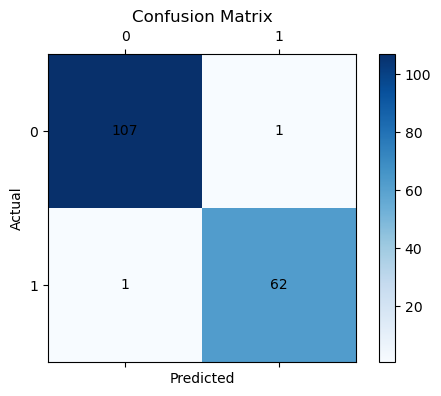

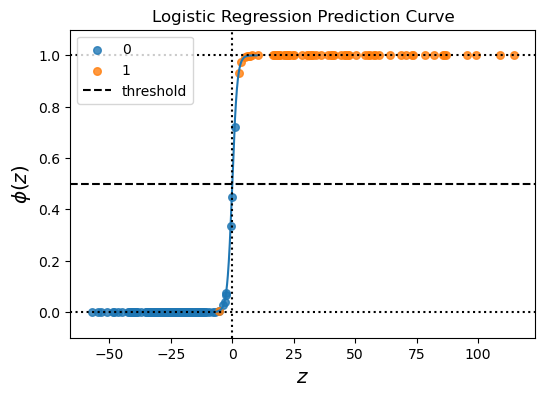

In [10]:
log_reg.plot_confusion_matrix(predictions, y_test, normalized=False)
log_reg.plot_prediction_curve(X_test, y_test)

### 5. Scikit-learn Model

In the last step we will perform binary classification with `scikit-learn`'s logit regression model. Firstly, hyperparameter tuning will be performed. Then, the predictions will be computed and the evaluation scores will be printed. We should except similar results as in previous point.

In [11]:
from sklearn.linear_model import LogisticRegression as LogRegression
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'C': [1.0, 0.1, 0.01, 0.001],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.2, 0.5, 0.8],
}

log_sk = LogRegression()
grid_search = GridSearchCV(log_sk, param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# display results
print('Best hyperparameters:', grid_search.best_params_)
print('Best accuracy score: {:.4f}'.format(grid_search.best_score_))

# evaluate on the test/validation set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print('\nTest accuracy: {:.4f}'.format(accuracy))

Best hyperparameters: {'C': 1.0, 'l1_ratio': 0.2, 'penalty': 'l2'}
Best accuracy score: 0.9748

Test accuracy: 0.9825


In [12]:
# run model with best parameters
log_sk = LogRegression(**grid_search.best_params_)
log_sk.fit(X_train, y_train)

# make predictions on test data
predictions = log_sk.predict(X_test)

import sklearn.metrics as metrics

tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
specificity = tn / (tn + fp)

# display evaluation metrics
print('Accuracy: {:.4f}'.format(metrics.accuracy_score(predictions, y_test)))
print('Recall: {:.4f}'.format(metrics.recall_score(predictions, y_test)))
print('Precision: {:.4f}'.format(metrics.precision_score(predictions, y_test)))
print('Error rate: {:.4f}'.format(1.0 - metrics.accuracy_score(predictions, y_test)))
print('F1 score: {:.4f}'.format(metrics.f1_score(predictions, y_test)))
print('F2 score: {:.4f}'.format(5 * ((precision * recall) / (4 * precision + recall))))
print('Specificity: {:.4f}'.format(tn / (tn + fp)))
print('Arithmetric mean: {:.4f}'.format((recall + specificity) / 2))
print('Geometric mean: {:.4f}'.format((recall * specificity)**0.5))
print('Harmonic mean: {:.4f}'.format((2 * (recall * specificity)) / (recall + specificity)))
print('MCC: {:.4f}'.format(metrics.matthews_corrcoef(predictions, y_test)))
print('NPV: {:.4f}'.format(tn / (tn + fn)))
print('FNR: {:.4f}'.format(fn / (tp + fn)))
print('FPR: {:.4f}'.format(fp / (fp + tn)))
print('TNR: {:.4f}'.format(tn / (tn + fp)))
print('FDR: {:.4f}'.format(fp / (fp + tp)))
print('Log loss: {:.4f}'.format(metrics.log_loss(predictions, y_test)))
print('ROC: {:.4f}'.format(metrics.roc_auc_score(predictions, y_test)))
print('Misclassified Samples: {}'.format((y_test != predictions).sum()))

Accuracy: 0.9825
Recall: 0.9688
Precision: 0.9841
Error rate: 0.0175
F1 score: 0.9764
F2 score: 0.9810
Specificity: 0.9815
Arithmetric mean: 0.9828
Geometric mean: 0.9828
Harmonic mean: 0.9828
MCC: 0.9625
NPV: 0.9907
FNR: 0.0159
FPR: 0.0185
TNR: 0.9815
FDR: 0.0312
Log loss: 0.6323
ROC: 0.9797
Misclassified Samples: 3


In [13]:
# stack scores into list
sklearn_metrics = []

sklearn_metrics.append(metrics.accuracy_score(predictions, y_test))
sklearn_metrics.append(metrics.recall_score(predictions, y_test))
sklearn_metrics.append(metrics.precision_score(predictions, y_test))
sklearn_metrics.append(1.0 - metrics.accuracy_score(predictions, y_test))
sklearn_metrics.append(metrics.f1_score(predictions, y_test))
sklearn_metrics.append(5 * ((precision * recall) / (4 * precision + recall)))
sklearn_metrics.append(tn / (tn + fp))
sklearn_metrics.append((recall + specificity) / 2)
sklearn_metrics.append((recall * specificity)**0.5)
sklearn_metrics.append((2 * (recall * specificity)) / (recall + specificity))
sklearn_metrics.append(metrics.matthews_corrcoef(predictions, y_test))
sklearn_metrics.append(tn / (tn + fn))
sklearn_metrics.append(fn / (tp + fn))
sklearn_metrics.append(fp / (fp + tn))
sklearn_metrics.append(tn / (tn + fp))
sklearn_metrics.append(fp / (fp + tp))
sklearn_metrics.append(metrics.log_loss(predictions, y_test))
sklearn_metrics.append(metrics.roc_auc_score(predictions, y_test))
sklearn_metrics.append((y_test != predictions).sum())

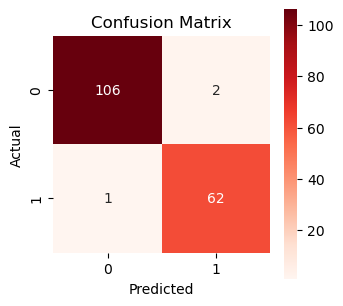

In [14]:
from seaborn import heatmap

plt.figure(figsize=(3.5, 3.5))
cm = metrics.confusion_matrix(y_test, predictions)
heatmap(cm, annot=True, cmap='Reds', fmt='.0f', square=True, cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# display metrics for both models side by side
metrics_list = ['Accuracy', 'Recall', 'Precision', 'Error rate', 'F1 score', 'F2 score',
                'Specificity', 'Arithmetric mean', 'Geometric mean', 'Harmonic mean', 'MCC',
                'NPV', 'FNR', 'FPR', 'TNR', 'FDR', 'Log loss', 'ROC', 'Misclassified samples']

score_dict = {'Score': metrics_list, 'Scratch Model': eval_metrics.values(), 'Sklearn Model': sklearn_metrics}

# compare scores for both models
pd.DataFrame(score_dict).style.hide(axis='index')

Score,Scratch Model,Sklearn Model
Accuracy,0.988304,0.982456
Recall,0.984127,0.968750
Precision,0.984127,0.984127
Error rate,0.011696,0.017544
F1 score,0.984127,0.976378
F2 score,0.984127,0.981013
Specificity,0.990741,0.981481
Arithmetric mean,0.987434,0.982804
Geometric mean,0.987428,0.982803
Harmonic mean,0.987423,0.982802


The logit regression model created from scratch performed very well on this dataset - even slightly higher then `scikit-learn`'s method. Note that using k-fold cross-validation might be a much more reliable to estimate the model's generalization error.

**References:**
* C. Albon, 2018, *Machine Learning with Python Cookbook: Practical Solutions from Preprocessing to Deep Learning, 2nd Edition*
* A. Géron, 2019, *Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems, 2nd Edition*